Importing all the libraries needed for the project

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gdp
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import statsmodels.api as sm

ETL

In [170]:
crops_yields=pd.read_csv('D:\\Coding Repository\\Assignment 2\\Project\\Palette_Final_Project\\rm_crop_yields_1938_2021.csv')

In [171]:
crops_yields.shape

(25017, 18)

EDA

In [172]:
crops_yields.dtypes

Year              int64
RM                int64
Winter Wheat    float64
Canola          float64
Spring Wheat    float64
Mustard         float64
Durum           float64
Sunflowers      float64
Oats            float64
Lentils         float64
Peas            float64
Barley          float64
Fall Rye        float64
Canary Seed     float64
Spring Rye      float64
Tame Hay        float64
Flax            float64
Chickpeas       float64
dtype: object

In [173]:
crops_yields.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25017 entries, 0 to 25016
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Year          25017 non-null  int64  
 1   RM            25017 non-null  int64  
 2   Winter Wheat  3037 non-null   float64
 3   Canola        14008 non-null  float64
 4   Spring Wheat  24924 non-null  float64
 5   Mustard       4487 non-null   float64
 6   Durum         11581 non-null  float64
 7   Sunflowers    946 non-null    float64
 8   Oats          23913 non-null  float64
 9   Lentils       5515 non-null   float64
 10  Peas          8134 non-null   float64
 11  Barley        24703 non-null  float64
 12  Fall Rye      15847 non-null  float64
 13  Canary Seed   3819 non-null   float64
 14  Spring Rye    805 non-null    float64
 15  Tame Hay      4205 non-null   float64
 16  Flax          20934 non-null  float64
 17  Chickpeas     960 non-null    float64
dtypes: float64(16), int64(2)
m

In [174]:
crops_yields.agg(['mean','std'])

Year          RM  Winter Wheat     Canola  Spring Wheat  \
mean  1979.385938  248.957509      38.24350  24.146796     25.778733   
std     24.221744  148.829628      12.20715   9.209177     11.153028   

         Mustard      Durum  Sunflowers       Oats      Lentils       Peas  \
mean  844.185955  29.024429  692.629915  47.104433  1171.778849  30.971982   
std   275.700375   9.829962  555.776604  21.775369   408.937628  10.223101   

         Barley   Fall Rye  Canary Seed  Spring Rye  Tame Hay       Flax  \
mean  38.022104  21.225298   995.140223    7.575776  1.181520  14.287663   
std   16.610425  10.101176   354.208181   12.473814  0.654725   7.082308   

        Chickpeas  
mean  1408.060594  
std    579.635067

In [175]:
crops_yields.isna().sum()

Year                0
RM                  0
Winter Wheat    21980
Canola          11009
Spring Wheat       93
Mustard         20530
Durum           13436
Sunflowers      24071
Oats             1104
Lentils         19502
Peas            16883
Barley            314
Fall Rye         9170
Canary Seed     21198
Spring Rye      24212
Tame Hay        20812
Flax             4083
Chickpeas       24057
dtype: int64

<AxesSubplot: xlabel='Year'>

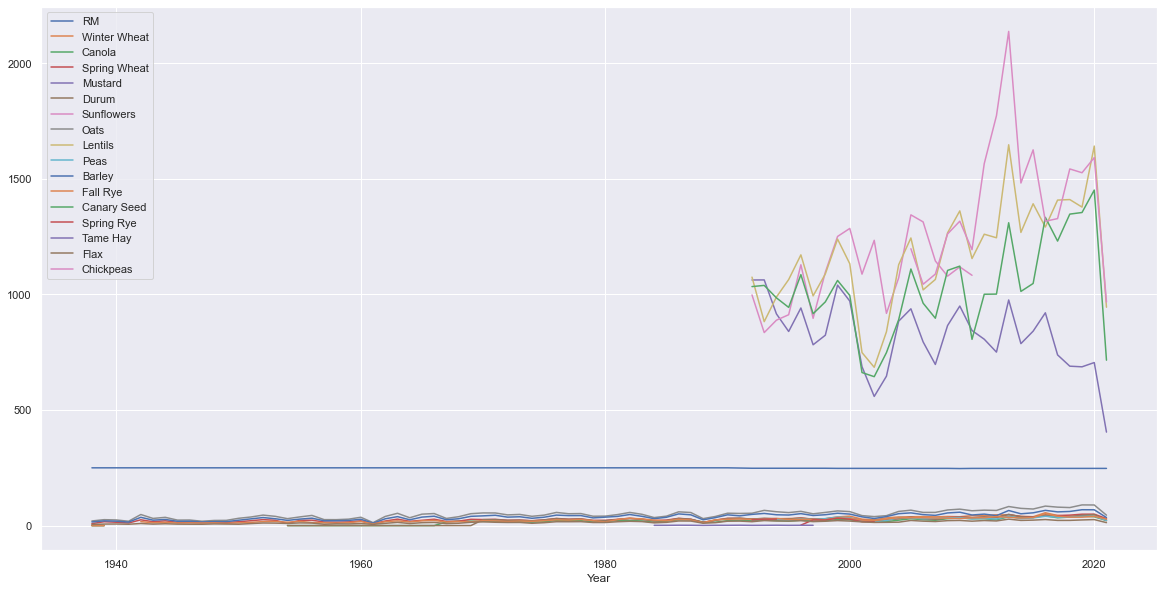

In [176]:
crops_yields.groupby('Year').mean().plot(figsize=(20,10))

There is alot of missing Data before 1965.

In [177]:
new_yields=crops_yields.loc[crops_yields['Year']>1965]
new_yields.mean()

Year            1993.411835
RM               248.535777
Winter Wheat      38.243500
Canola            24.170953
Spring Wheat      29.990710
Mustard          844.185955
Durum             29.059558
Sunflowers       692.629915
Oats              55.341940
Lentils         1171.778849
Peas              30.971982
Barley            45.049310
Fall Rye          25.222747
Canary Seed      995.140223
Spring Rye         7.575776
Tame Hay           1.181520
Flax              17.497225
Chickpeas       1408.060594
dtype: float64

Some of the crops seems to have the crops yield in pounds.

In [178]:
new_yields['Mustard']=new_yields['Mustard']/50
new_yields['Sunflowers']=new_yields['Sunflowers']/30
new_yields['Lentils']=new_yields['Lentils']/60
new_yields['Canary Seed']=new_yields['Canary Seed']/50
new_yields['Chickpeas']=new_yields['Chickpeas']/60

C:\Users\96654\AppData\Local\Temp\ipykernel_20488\278884069.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_yields['Mustard']=new_yields['Mustard']/50
C:\Users\96654\AppData\Local\Temp\ipykernel_20488\278884069.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_yields['Sunflowers']=new_yields['Sunflowers']/30
C:\Users\96654\AppData\Local\Temp\ipykernel_20488\278884069.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

<AxesSubplot: xlabel='Year'>

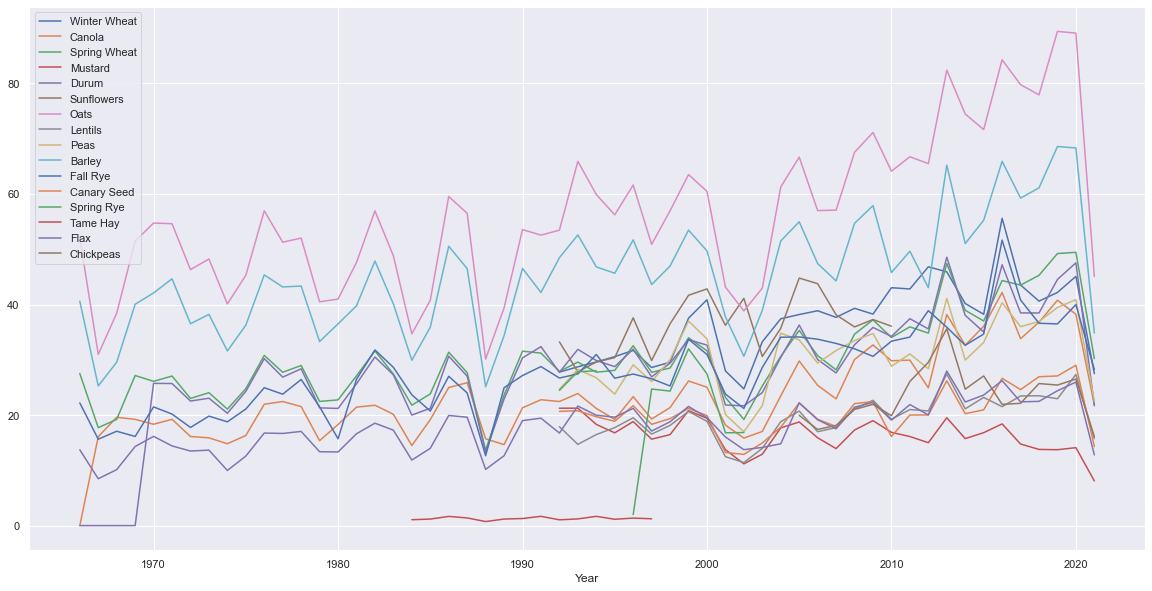

In [179]:
drawing=new_yields.drop('RM',axis=1)
drawing.groupby('Year').mean().plot(figsize=(20,10))


In [180]:
new_yields.isna().sum()

Year                0
RM                  0
Winter Wheat    13608
Canola           2651
Spring Wheat       84
Mustard         12158
Durum            5078
Sunflowers      15699
Oats             1039
Lentils         11130
Peas             8511
Barley            238
Fall Rye         6574
Canary Seed     12826
Spring Rye      15840
Tame Hay        12440
Flax             2929
Chickpeas       15685
dtype: int64

In [181]:
x=new_yields.groupby('RM').mean()

From this table I found RM 521 has no data, and sunflower,checkpies and Sprin Rye has close to no data. I decided to exclude them from the study.

Replacing the null value with the mean of each RM.

In [182]:
new_yields=new_yields.drop(['Tame Hay','Spring Rye','Chickpeas','Sunflowers'],axis=1)
clean_yields=new_yields.groupby('RM').apply(lambda x: x.fillna(x.mean()))
clean_yields = clean_yields.drop(clean_yields[clean_yields['RM'] == 521].index)
clean_yields.isna().sum()

Year               0
RM                 0
Winter Wheat     841
Canola             0
Spring Wheat       0
Mustard         1313
Durum            193
Oats               0
Lentils          697
Peas              26
Barley             0
Fall Rye           0
Canary Seed      460
Flax              26
dtype: int64

There is still null values because some RM did not grow these crops.

<AxesSubplot: xlabel='Year'>

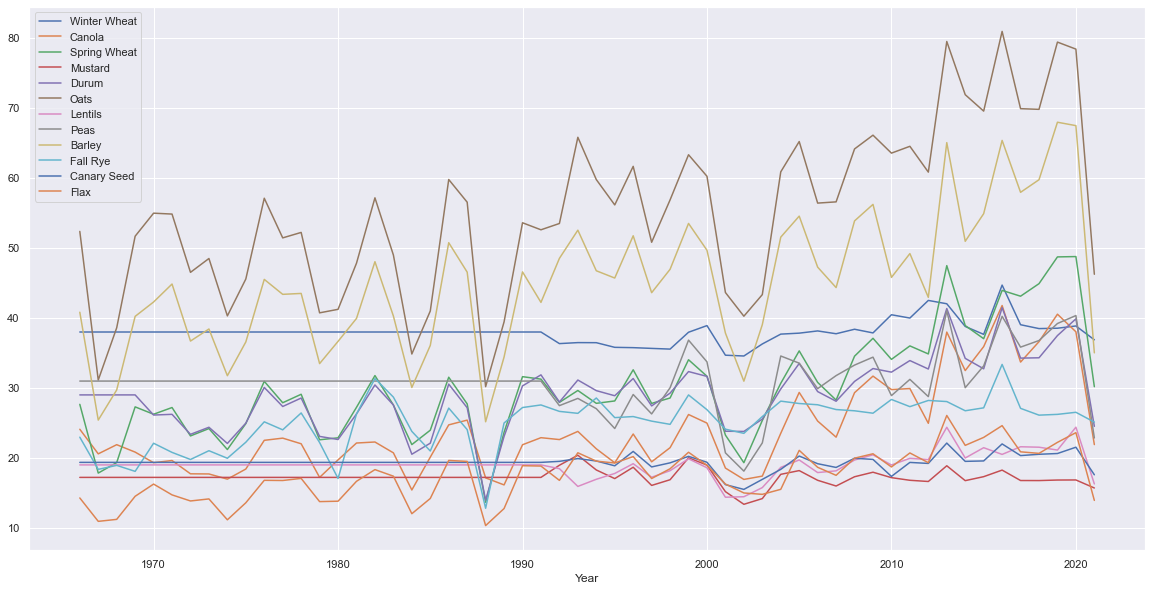

In [183]:
draw=clean_yields.drop('RM',axis=1)
draw.groupby('Year').mean().plot(figsize=(20,10))

In [184]:
clean_yields.drop(['Year','RM'],axis=1).mean().nlargest(5)

Oats            55.073464
Barley          45.040426
Winter Wheat    37.947842
Peas            30.936464
Spring Wheat    30.016503
dtype: float64

The Largest yield crops are Oats, Barley, Winter Wheat, Peas, Spring Wheat. 
They will be my main focus and I am interested in the Canola Also.

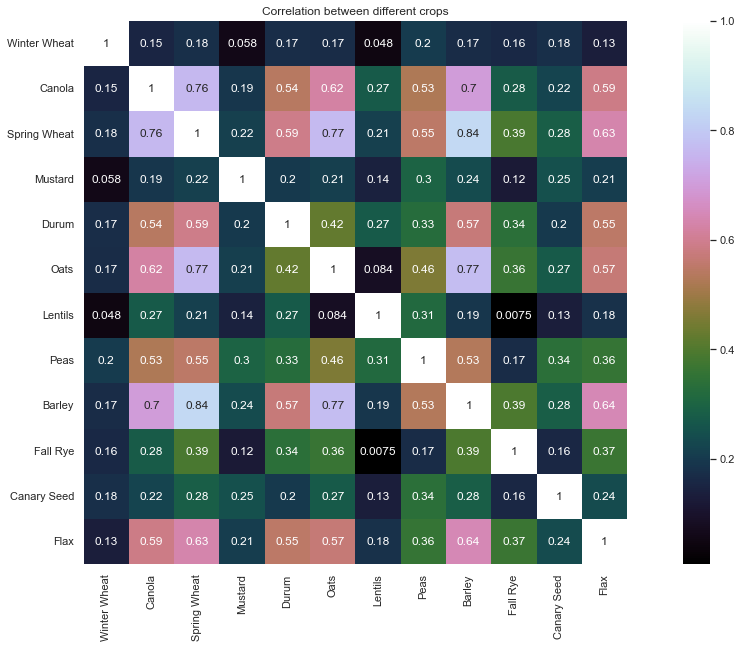

In [185]:
correlation = clean_yields.drop(['Year','RM'],axis=1).corr()

plt.figure(figsize=(20,10))
g = sb.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix',xticklabels=True,yticklabels=True)
g.set_yticklabels(g.get_yticklabels(), rotation =0)
g.set_xticklabels(g.get_yticklabels(), rotation =90)
plt.title('Correlation between different crops')
plt.show()

There is strong positive Corrolation between Spring Wheat, Canola, Oats, Flax, Durum and Barley.

Year     0
RM       0
Crop     0
Yield    0
dtype: int64

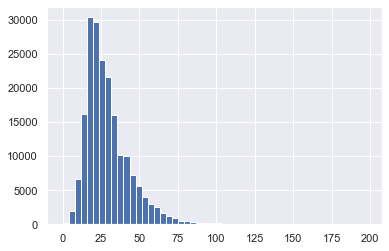

In [186]:
melted_yield = pd.melt(clean_yields, id_vars=['Year','RM'], value_vars=['Winter Wheat','Spring Wheat','Mustard','Durum','Oats','Lentils','Peas','Barley','Fall Rye','Canary Seed','Flax','Canola'], var_name='Crop', value_name='Yield').dropna()

melted_yield['Yield'].hist(bins=50)
melted_yield.isna().sum()


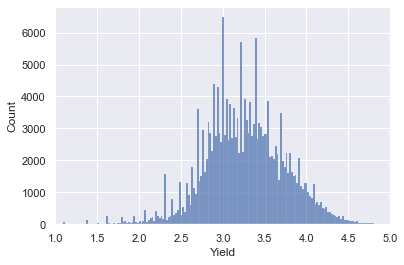

In [187]:
melted_yield['Yield'] = melted_yield['Yield'].replace(0, 0.01)
log=np.log(melted_yield['Yield'])

logmelt=melted_yield
logmelt['Yield']=log
ax=sb.histplot(data=logmelt['Yield'])
ax.set(xlim=(1,5 ))
plt.show()

The data does look approximately normally distributed to me. :))

C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


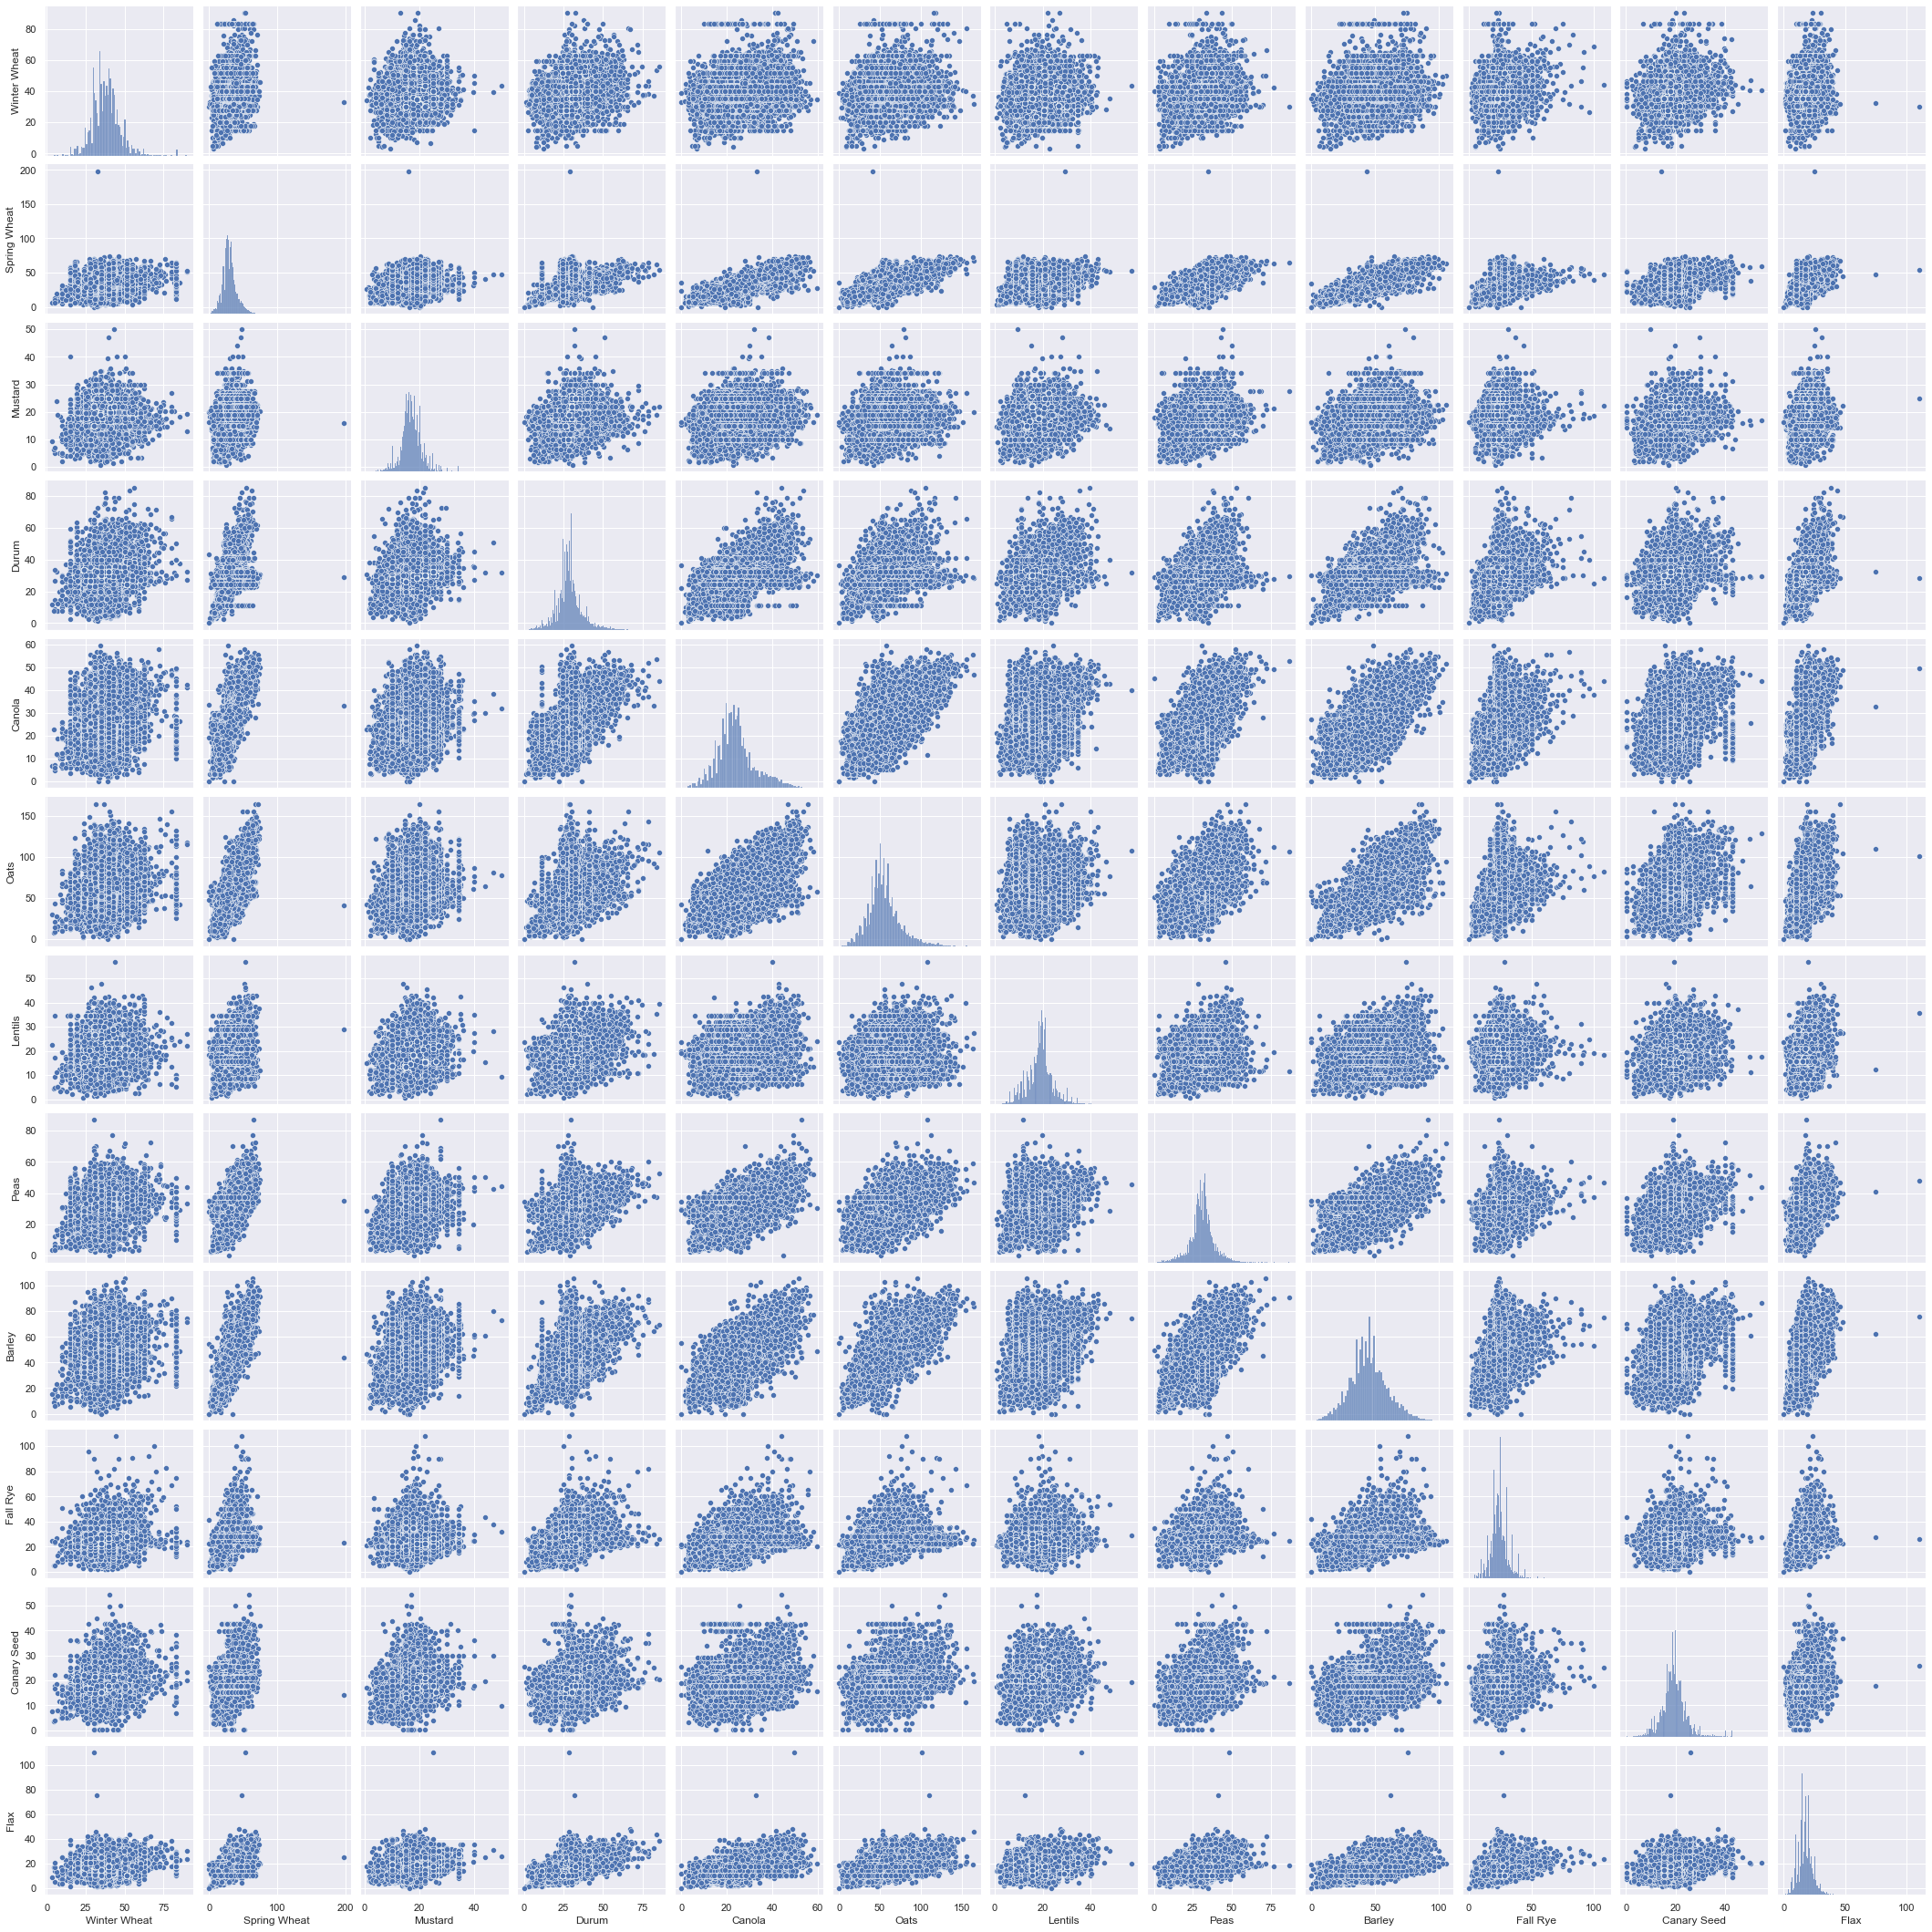

In [188]:
sb.set()
cols = ['Winter Wheat','Spring Wheat','Mustard','Durum','Canola','Oats','Lentils','Peas','Barley','Fall Rye','Canary Seed','Flax']
sb.pairplot(clean_yields[cols], size = 2.5)
plt.show()

There is correlation between Oats, Canola, Durum and Barley

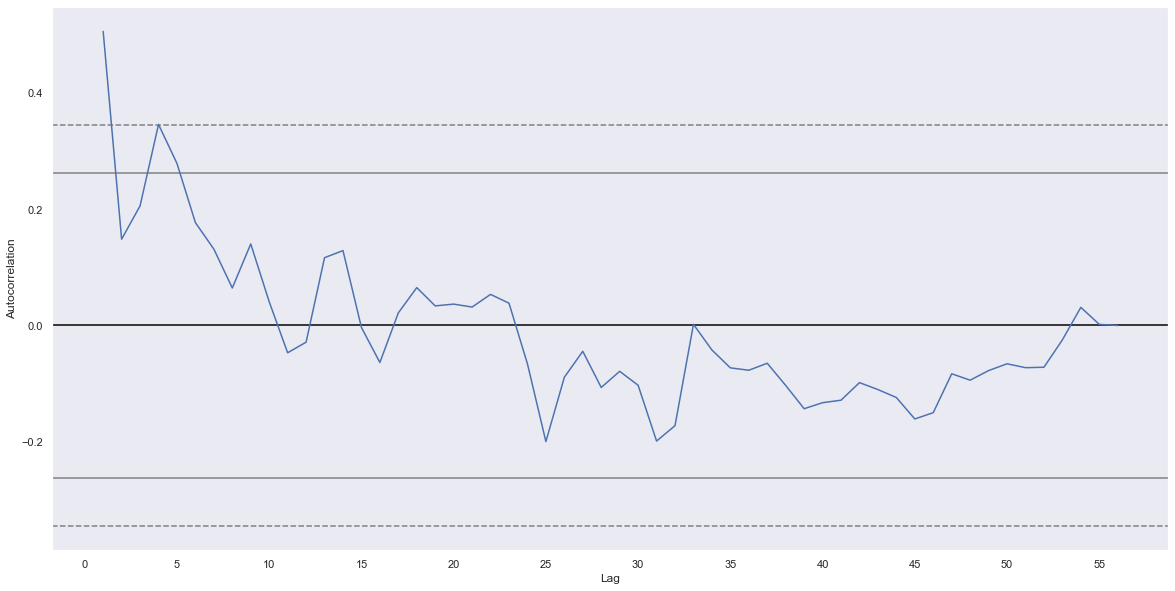

In [189]:
fig, ax = plt.subplots(figsize=(20,10))
pd.plotting.autocorrelation_plot(melted_yield.groupby('Year').mean()['Yield'], ax=ax)
ax.set_xticks(range(0, len(melted_yield.groupby('Year').mean()['Yield']), 5)) 
plt.show()

There is a significant autocorrelation at 4 years which suggests that the Yield has a long memory and that its values from 4 years ago may still be relevant in predicting its future values. 

In [190]:
mean=logmelt.groupby('RM').mean().reset_index()
std=logmelt.groupby('RM').std().reset_index()
vc=std/mean
mean_df = pd.DataFrame(np.exp(mean['Yield'])).add_suffix('_mean')
std_df = pd.DataFrame(np.exp(std['Yield'])).add_suffix('_std')
vc_df=pd.DataFrame(np.exp(vc['Yield'])).add_suffix('_vc')

result_y = pd.concat([mean[['RM']], mean_df, std_df, vc_df], axis=1, sort=False)
result_y.head()

RM  Yield_mean  Yield_std  Yield_vc
0   1   25.294405   1.683042  1.174859
1   2   26.789518   1.582659  1.149849
2   3   26.079170   1.646465  1.165209
3   4   24.217333   1.529570  1.142647
4   5   22.700556   1.752354  1.196807

Using the Unsupervised ML model Kmeans, between the mean and the Interquantile range (Variation).

C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

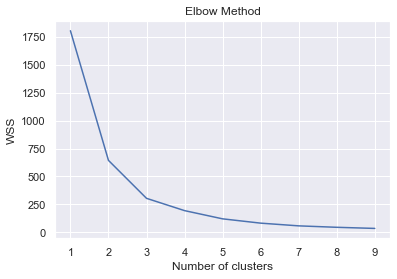

In [191]:
wss = []
data = result_y[['Yield_mean', 'Yield_vc']].values
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    wss.append(kmeans.inertia_)

plt.plot(range(1, 10), wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


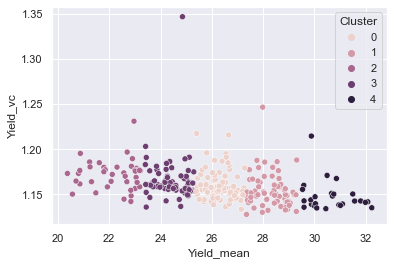

In [192]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=0)
labels = kmeans.fit_predict(data)
result_y['Cluster'] = labels
sb.scatterplot(x='Yield_mean', y='Yield_vc', hue='Cluster', data=result_y)
plt.show()



CV

Based On Risk.

In [193]:
clean_yields=new_yields.groupby('RM').apply(lambda x: x.fillna(x.mean())).reset_index()
clean_yields.head()

index  Year  RM  Winter Wheat     Canola  Spring Wheat  Mustard      Durum  \
0     28  1966   1     42.945217  21.947115          23.0  15.1779  23.922286   
1     29  1967   1     42.945217  21.947115          11.0  15.1779  23.922286   
2     30  1968   1     42.945217  21.947115          18.0  15.1779  23.922286   
3     31  1969   1     42.945217  21.947115          30.0  15.1779  23.922286   
4     32  1970   1     42.945217  18.000000          18.0  15.1779  18.000000   

   Oats    Lentils  Peas  Barley  Fall Rye  Canary Seed  Flax  
0  43.0  15.044444  32.5    33.0      24.0        19.28  10.0  
1  21.0  15.044444  32.5    15.0      16.0        19.28   4.0  
2  33.0  15.044444  32.5    25.0      15.0        19.28   8.0  
3  56.0  15.044444  32.5    45.0      18.0        19.28  12.0  
4  42.0  15.044444  32.5    34.0      20.0        19.28  14.0

**CANOLA**

index     0
Year      0
RM        0
Canola    0
dtype: int64

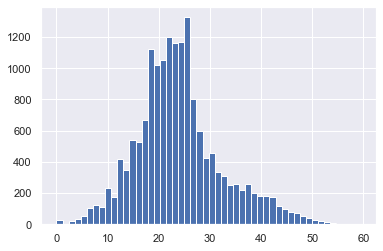

In [194]:
drop_list=['Winter Wheat','Spring Wheat','Mustard','Durum','Oats','Lentils','Peas','Barley','Fall Rye','Canary Seed','Flax']
clean_canola=clean_yields.drop(drop_list,axis=1,inplace=False)
clean_canola['Canola'].hist(bins=50)
clean_canola.isna().sum()


That looks almost normal.

In [195]:
mean=clean_canola.groupby('RM').mean().reset_index().replace(0,0.000000000000001)
std=clean_canola.groupby('RM').std().reset_index()
vc=std/mean

mean_df = pd.DataFrame(mean['Canola']).add_suffix('_mean')
std_df = pd.DataFrame(std['Canola']).add_suffix('_std')
vc_df=pd.DataFrame(vc['Canola']).add_suffix('_vc')

result_c = pd.concat([mean[['RM']], mean_df, vc_df], axis=1, sort=False)

result_c.isna().sum()

RM             0
Canola_mean    0
Canola_vc      0
dtype: int64

C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

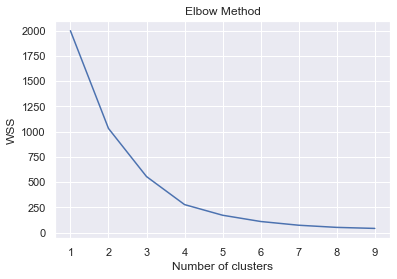

In [196]:
wss = []
data = result_c[['Canola_mean', 'Canola_vc']].values
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    wss.append(kmeans.inertia_)

plt.plot(range(1, 10), wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


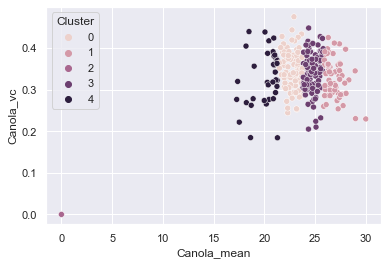

In [197]:
k = 5
kmeans = KMeans(n_clusters=k, random_state=0)
labels = kmeans.fit_predict(data)
result_c['Cluster'] = labels
sb.scatterplot(x='Canola_mean', y='Canola_vc', hue='Cluster', data=result_c)
plt.show()

Now I can pick one RM from Cluster 1, to do time serience analysis and some prediction. RM = 213 SALTCOATS

<AxesSubplot: xlabel='Year'>

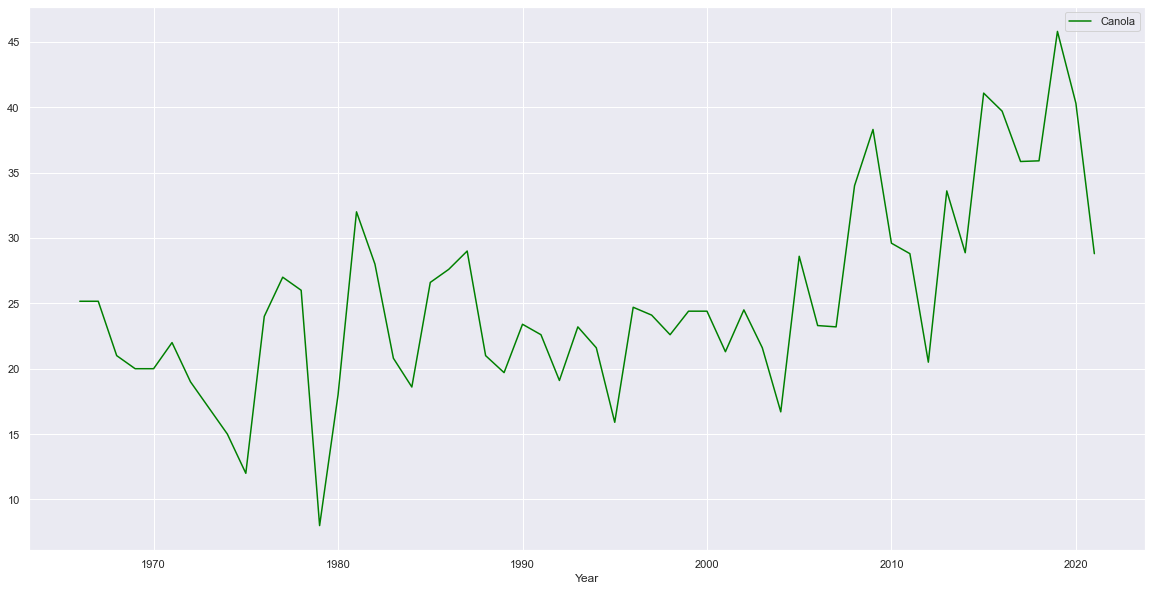

In [198]:
canola_213=clean_canola.loc[clean_canola['RM']==213][['Year','Canola']].set_index('Year')
canola_213.plot(figsize=(20,10),color='green')

Splitting the data between Training and testing.

In [199]:
train_size = int(0.8*len(canola_213))
train, test = canola_213[:train_size],canola_213[train_size:]

Using Auto_Regrission model.

C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


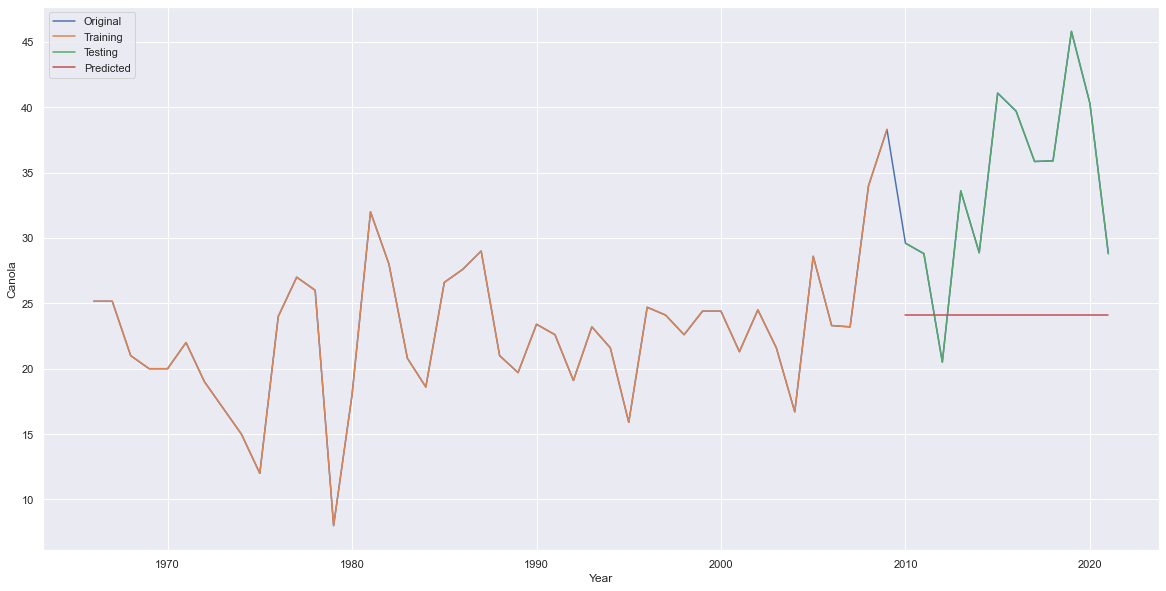

Mean Absolute Error: 10.571823986308763
Root Mean Squared Error 12.056072524674624


In [200]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
# Fit an AR model to the training set with an order of 1
ar_model = sm.tsa.AutoReg(train, lags=6).fit()

# Make predictions on the testing set
pred_ar = ar_model.predict(start=test.index[0], end=test.index[-1])


# Plot the original time series, the training set, and the testing set
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(canola_213, label='Original')
ax.plot(train, label='Training')
ax.plot(test, label='Testing')
ax.plot(pred_ar, label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Canola')
ax.legend()
plt.show()

# Evaluate the model's performance on the testing set
mae = mean_absolute_error(test, pred_ar )
rmse_1 = mean_squared_error(test, pred_ar , squared=False)

print('Mean Absolute Error:', mae)
print('Root Mean Squared Error', rmse_1)


Using ARIMA model.

C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCac

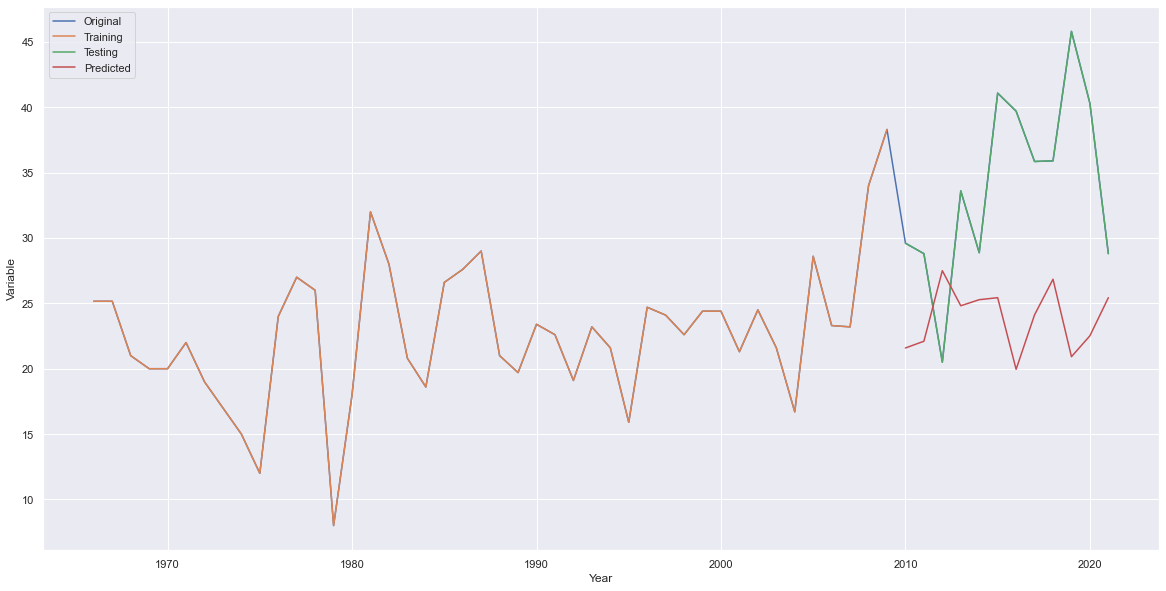

Mean Absolute Error: 10.571823986308763
Root Mean Squared Error 13.067583193717807


In [201]:
from statsmodels.tsa.arima.model import ARIMA

# Fit an ARMA(2,2) model to the training set
arma_model = ARIMA(train, order=(6,0,2)).fit()

# Make predictions on the testing set
pred_arma = arma_model.forecast(steps=int(len(test)))
forecast_dates = test.index
pred_arma_table = pd.DataFrame({'Year': forecast_dates, 'Predictions': pred_arma}).set_index('Year')


# Plot the original time series, the training set, and the testing set
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(canola_213, label='Original')
ax.plot(train, label='Training')
ax.plot(test, label='Testing')
ax.plot(pred_arma_table, label='Predicted')
ax.set_xlabel('Year')
ax.set_ylabel('Variable')
ax.legend()
plt.show()
# Evaluate the model's performance on the testing set
mae_ = mean_absolute_error(test, pred_arma)
rmse_2 = mean_squared_error(test, pred_arma, squared=False)

print('Mean Absolute Error:', mae)
print('Root Mean Squared Error', rmse_2)


Exponential Smoothing model.

C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\statsmodels\tsa\base\tsa_model.py:834: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


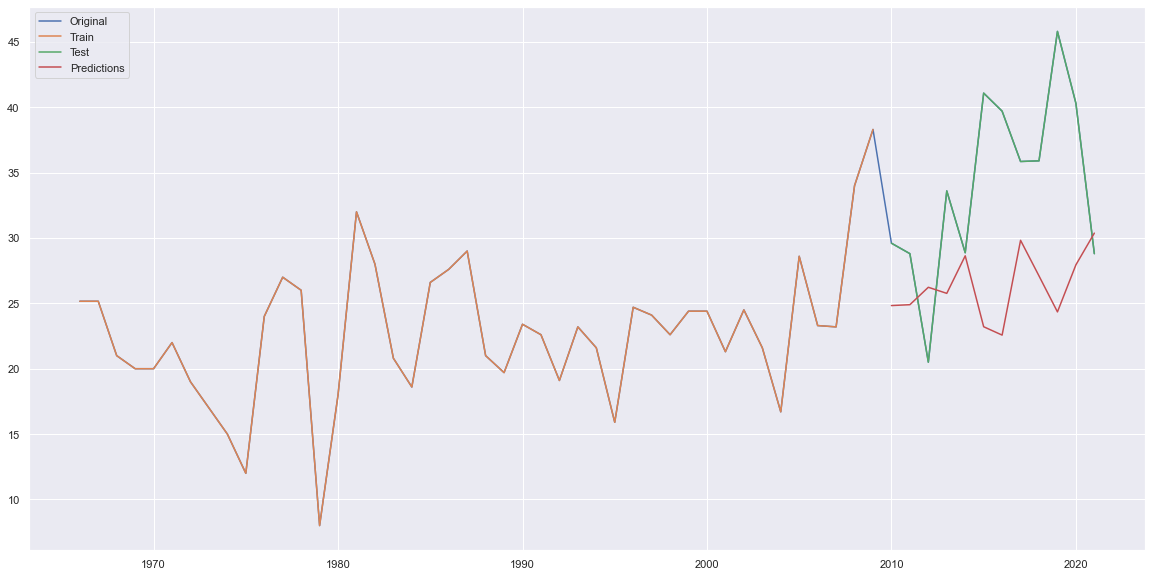

Mean Absolute Error: 8.974099461075019
Root Mean Squared Error 11.084347221004355


In [202]:
from statsmodels.tsa.api import ExponentialSmoothing
model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
fit_model = model.fit()

# Make predictions on test set
predictions = fit_model.forecast(len(test))

# Plot actual and predicted values
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(canola_213, label='Original')
plt.plot(train.index, train.values, label='Train')
plt.plot(test.index, test.values, label='Test')
plt.plot(test.index, predictions.values, label='Predictions')
plt.legend()
plt.show()
mae = mean_absolute_error(test, predictions)
rmse_3 = mean_squared_error(test, predictions, squared=False)

print('Mean Absolute Error:', mae)
print('Root Mean Squared Error', rmse_3)


Using Gradient Boosting Regressor model

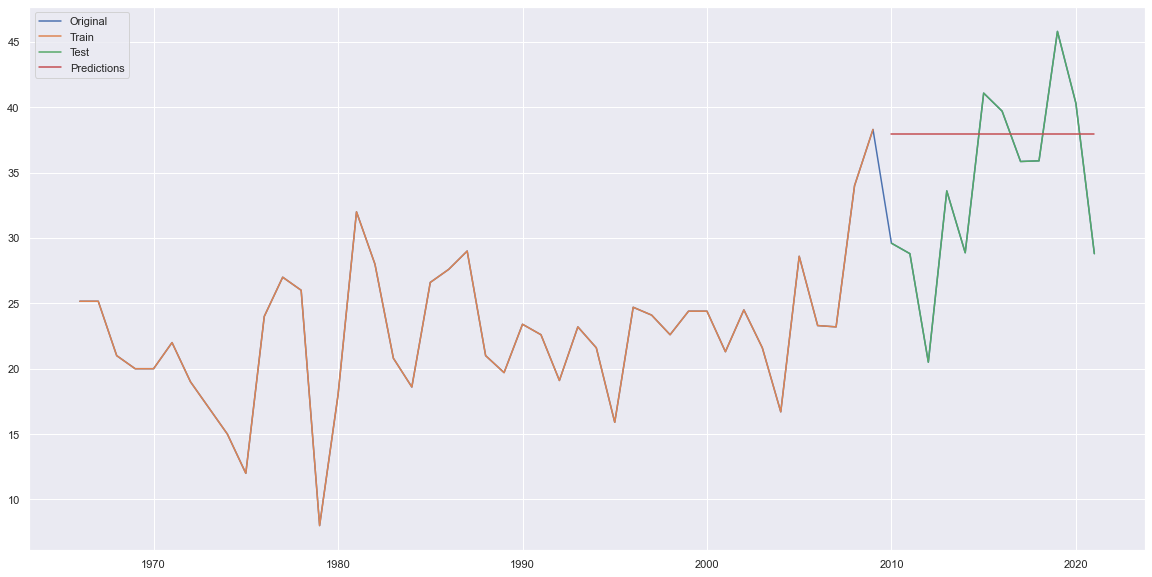

Mean Absolute Error: 6.409806848131264
Root Mean Squared Error 7.828092799278253


In [203]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split


# Load dataset
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train.reset_index()['Year'].to_numpy().reshape(-1, 1),test.reset_index()['Year'].to_numpy().reshape(-1, 1),train['Canola'].values,test['Canola'].values

# Initialize Gradient Boosting Regression model with default hyperparameters
gb_reg = GradientBoostingRegressor()

# Fit the model to the training data
gb_reg.fit(X_train, y_train)

# Predict on the testing data
y_pred = gb_reg.predict(X_test)

# Plot actual and predicted values
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(canola_213, label='Original')
plt.plot(train.index, train.values, label='Train')
plt.plot(test.index, test.values, label='Test')
plt.plot(test.index, y_pred, label='Predictions')
plt.legend()
plt.show()

# Evaluate the model using mean squared error
mae = mean_absolute_error(test, y_pred)
rmse_4 = mean_squared_error(test, y_pred, squared=False)

print('Mean Absolute Error:', mae)
print('Root Mean Squared Error', rmse_4)


Random Forest Model

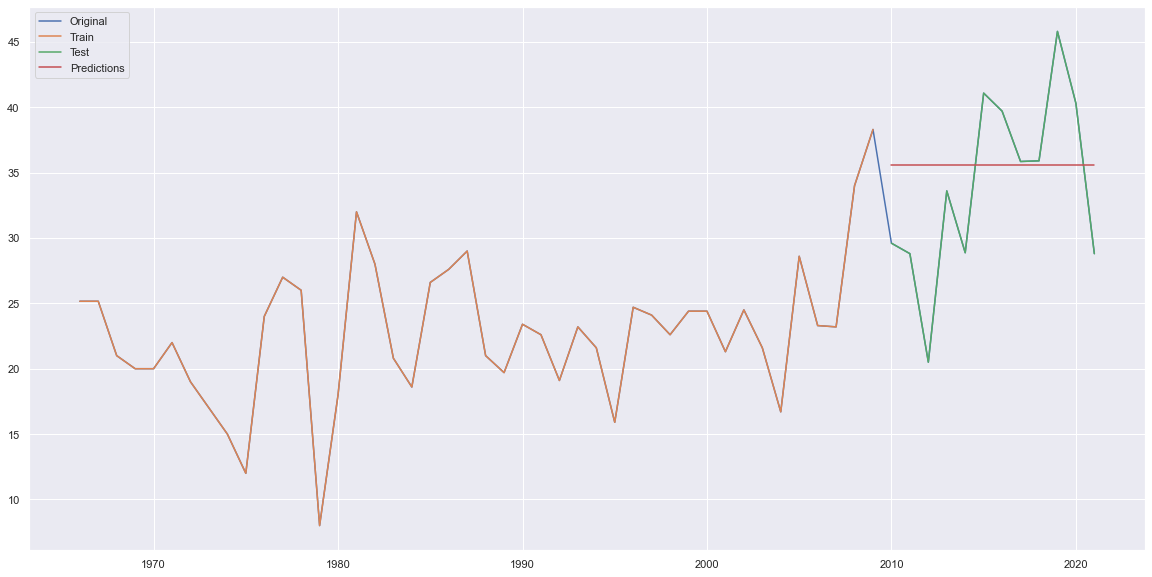

Mean Absolute Error: 5.704999999999999
Root Mean Squared Error 6.9425796838543175


In [204]:

from sklearn.ensemble import RandomForestRegressor


# Create Random Forest model and fit to training data
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(train.reset_index()[['Year']], train['Canola'])

# Make predictions on test data
rf_pred = rf_model.predict(test.reset_index()[['Year']])

# Plot actual and predicted values
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(canola_213, label='Original')
plt.plot(train.index, train.values, label='Train')
plt.plot(test.index, test.values, label='Test')
plt.plot(test.index, rf_pred, label='Predictions')
plt.legend()
plt.show()

# Evaluate the model using mean squared error
mae = mean_absolute_error(test, rf_pred)
rmse_5 = mean_squared_error(test, rf_pred, squared=False)

print('Mean Absolute Error:', mae)
print('Root Mean Squared Error', rmse_5)

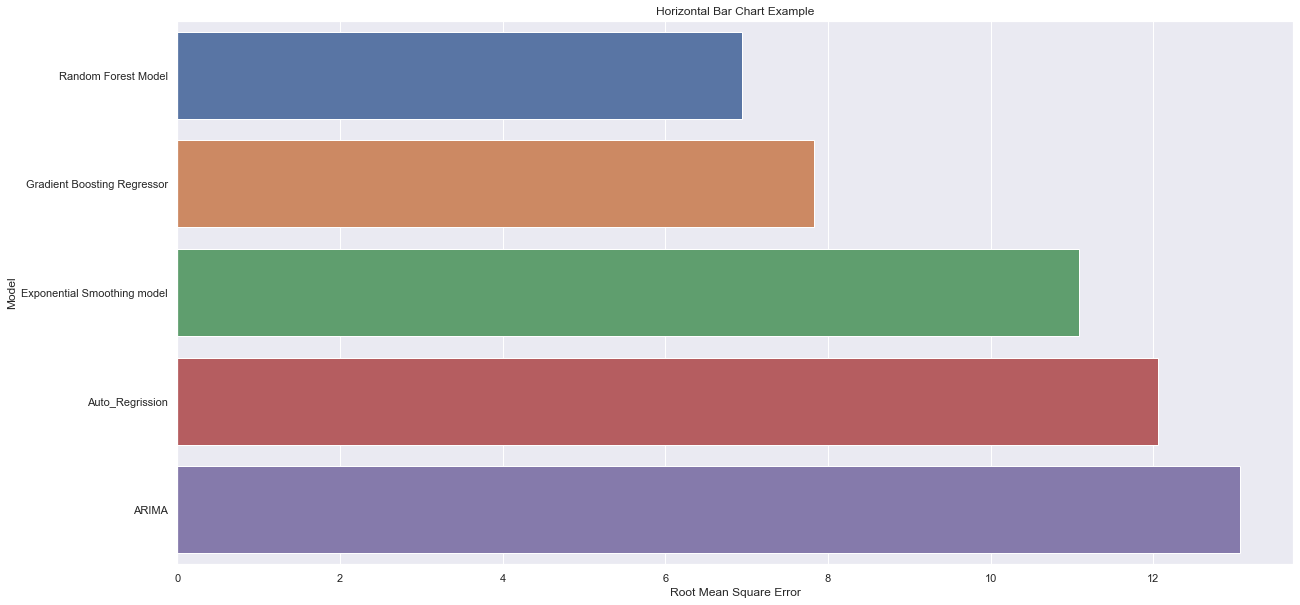

In [205]:
comparizon =  pd.DataFrame({
    'Model': ['Auto_Regrission', 'ARIMA', 'Exponential Smoothing model','Gradient Boosting Regressor','Random Forest Model'],
    'RMSE': [rmse_1, rmse_2, rmse_3,rmse_4,rmse_5]
})
plt.figure(figsize=(20, 10))
comparizon_sorted = comparizon.sort_values(by='RMSE', ascending=True)
sb.barplot(y=comparizon_sorted['Model'], x=comparizon_sorted['RMSE'], orient='horizontal')

plt.ylabel('Model')
plt.xlabel('Root Mean Square Error')
plt.title('Horizontal Bar Chart Example')

# Display the chart
plt.show()

**Oats**

array([[<AxesSubplot: title={'center': 'Oats'}>]], dtype=object)

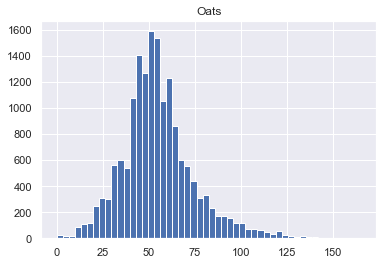

In [206]:
clean_yields=new_yields.groupby('RM').apply(lambda x: x.fillna(x.mean()))
clean_Oats = clean_yields
drop_list=['Year','Winter Wheat','Spring Wheat','Mustard','Durum','Canola','Lentils','Peas','Barley','Fall Rye','Canary Seed','Flax']
clean_Oats.drop(drop_list,axis=1,inplace=True)
clean_Oats.dropna()
clean_Oats.hist('Oats',bins=50)


In [207]:
mean=clean_Oats.groupby('RM').mean().reset_index().replace(0,0.0000000000000001)
std=clean_Oats.groupby('RM').std().reset_index()
vc=std/mean

mean_ot = pd.DataFrame(mean['Oats']).add_suffix('_mean')
std_ot = pd.DataFrame(std['Oats']).add_suffix('_std')
vc_ot=pd.DataFrame(vc['Oats']).add_suffix('_vc')

result_oats = pd.concat([mean[['RM']], mean_ot, vc_ot], axis=1, sort=False)
print(result_oats)

      RM  Oats_mean   Oats_vc
0      1  54.681607  0.365528
1      2  55.366964  0.278663
2      3  52.783393  0.256088
3      4  46.248868  0.302762
4      5  44.538298  0.301666
..   ...        ...       ...
294  529  42.700000  0.318398
295  555  57.792340  0.331466
296  561  59.393922  0.296607
297  588  61.335536  0.287373
298  622  57.109107  0.428459

[299 rows x 3 columns]


C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

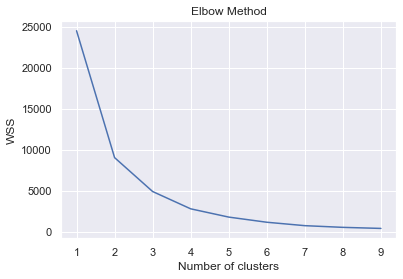

In [208]:
wss = []
data = result_oats[['Oats_mean', 'Oats_vc']].values
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    wss.append(kmeans.inertia_)

plt.plot(range(1, 10), wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


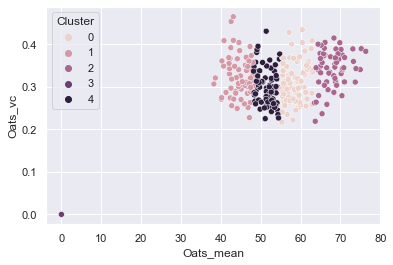

In [209]:
data = result_oats[['Oats_mean', 'Oats_vc']].values
k = 5
kmeans = KMeans(n_clusters=k, random_state=0)
labels = kmeans.fit_predict(data)
result_oats['Cluster'] = labels
sb.scatterplot(x='Oats_mean', y='Oats_vc', hue='Cluster', data=result_oats)
plt.show()


**Barley**

<AxesSubplot: >

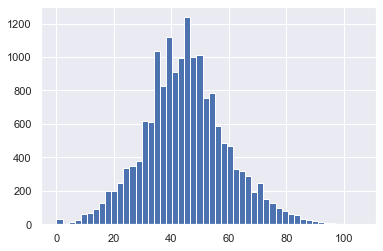

In [210]:
clean_yields=new_yields.groupby('RM').apply(lambda x: x.fillna(x.mean()))
clean_Barley = clean_yields
drop_list=['Year','Winter Wheat','Spring Wheat','Mustard','Durum','Canola','Lentils','Peas','Oats','Fall Rye','Canary Seed','Flax']
clean_Barley.drop(drop_list,axis=1,inplace=True)
clean_Barley['Barley'].hist(bins=50)


In [211]:
mean=clean_Barley.groupby('RM').mean().reset_index().replace(0,0.000000000000000001)
std=clean_Barley.groupby('RM').std().reset_index()
vc=std/mean

mean_Ba = pd.DataFrame(mean['Barley']).add_suffix('_mean')
std_Ba = pd.DataFrame(std['Barley']).add_suffix('_std')
vc_Ba=pd.DataFrame(std['Barley']).add_suffix('_vc')

result_Barley = pd.concat([mean[['RM']], mean_Ba, vc_Ba], axis=1, sort=False)
print(result_Barley)

      RM  Barley_mean  Barley_vc
0      1    45.957091  16.474071
1      2    46.186607  12.080910
2      3    47.354286  13.372542
3      4    38.014107  10.906272
4      5    40.761321  15.522958
..   ...          ...        ...
294  529    35.731818  10.517505
295  555    40.117250  12.389379
296  561    45.556604  14.131719
297  588    47.992679  15.139992
298  622    43.139273  14.838780

[299 rows x 3 columns]


C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

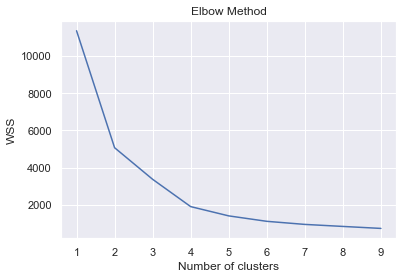

In [212]:
wss = []
data = result_Barley[['Barley_mean', 'Barley_vc']].values
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    wss.append(kmeans.inertia_)

plt.plot(range(1, 10), wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


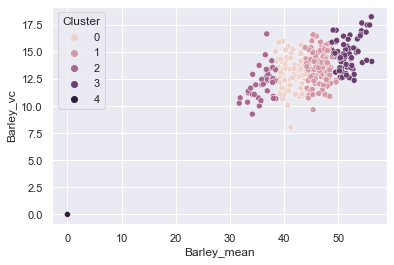

In [213]:
k = 5
kmeans = KMeans(n_clusters=k)
labels = kmeans.fit_predict(data)
result_Barley['Cluster'] = labels
sb.scatterplot(x='Barley_mean', y='Barley_vc', hue='Cluster', data=result_Barley)
plt.show()

*Spring Wheat*

array([[<AxesSubplot: title={'center': 'Spring Wheat'}>]], dtype=object)

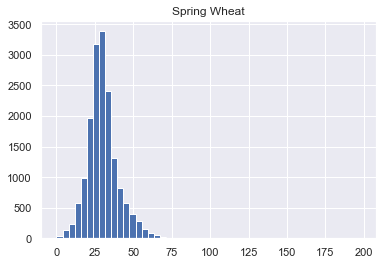

In [214]:
clean_yields=new_yields.groupby('RM').apply(lambda x: x.fillna(x.mean()))
clean_sw= clean_yields.dropna(subset=['Spring Wheat'])
drop_list=['Year','Barley','Peas','Mustard','Durum','Canola','Lentils','Winter Wheat','Oats','Fall Rye','Canary Seed','Flax']
clean_sw.drop(drop_list,axis=1,inplace=True)
clean_sw.hist('Spring Wheat',bins=50)

Sweet !! :D

In [215]:
mean=clean_sw.groupby('RM').mean().reset_index().replace(0,0.000000000001)
std=clean_sw.groupby('RM').std().reset_index()
vc=std/mean

mean_sw = pd.DataFrame(mean['Spring Wheat']).add_suffix('_mean')
std_sw = (pd.DataFrame(std['Spring Wheat']).add_suffix('_std'))
vc_sw = (pd.DataFrame(vc['Spring Wheat']).add_suffix('_vc'))

result_sw = pd.concat([mean[['RM']], mean_sw, vc_sw], axis=1, sort=False)
print(result_sw)


      RM  Spring Wheat_mean  Spring Wheat_vc
0      1          28.178000         0.360170
1      2          30.153636         0.304229
2      3          29.591964         0.293407
3      4          26.655536         0.340117
4      5          25.303929         0.329830
..   ...                ...              ...
294  529          21.584000         0.352119
295  555          28.667857         0.426995
296  561          32.432000         0.408256
297  588          33.659107         0.324717
298  622          32.424821         0.495341

[299 rows x 3 columns]


C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

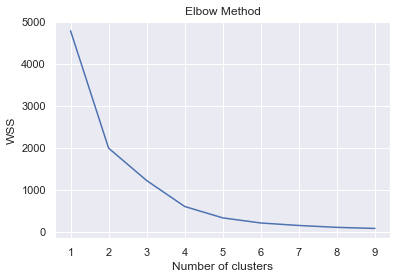

In [216]:
wss = []
data = result_sw[['Spring Wheat_mean', 'Spring Wheat_vc']].values
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=0)
    kmeans.fit(data)
    wss.append(kmeans.inertia_)

plt.plot(range(1, 10), wss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WSS')
plt.show()

C:\Users\96654\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


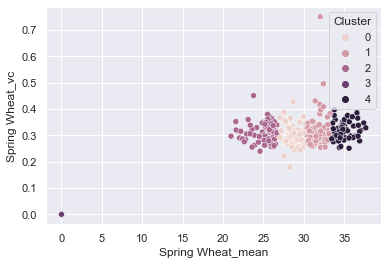

In [217]:
k = 5
kmeans = KMeans(n_clusters=k)
labels = kmeans.fit_predict(data)
result_sw['Cluster'] = labels
sb.scatterplot(x='Spring Wheat_mean', y='Spring Wheat_vc', hue='Cluster', data=result_sw)
plt.show()

ETL for the Spatial Data Taken from the Government of Canada, and changing the coloumn RM no. name to match the other file.

In [218]:
globe=gdp.read_file('C:\\Users\\96654\\Documents\\GitHub\\Palette_Training_5\\Rural Municipality\\Rural Municipality.shp')
globe['RMNO']=globe['RMNO'].astype('string')
globe['RM']=globe['RMNO'].astype(int)
globe.info()
globe.to_csv('C:\\Users\\96654\\Documents\\GitHub\\Palette_Training_5\\Rural Municipality\\globe.csv')

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 298 entries, 0 to 297
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   PPID        298 non-null    object  
 1   EFFDT       298 non-null    object  
 2   EXPDT       0 non-null      float64 
 3   FEATURECD   298 non-null    object  
 4   RMNO        298 non-null    string  
 5   RMNM        298 non-null    object  
 6   SHAPE_AREA  298 non-null    float64 
 7   SHAPE_LEN   298 non-null    float64 
 8   geometry    298 non-null    geometry
 9   RM          298 non-null    int32   
dtypes: float64(3), geometry(1), int32(1), object(4), string(1)
memory usage: 22.2+ KB


Merging both data sets.

In [219]:
merge=pd.merge(globe,clean_yields, on=['RM'],how='inner')

merge.to_csv('D:\\f\\merge.csv', index=False)

merge.head()


OSError: Cannot save file into a non-existent directory: 'D:\f'